In [1]:
from maelzel.core import *

ImportError: cannot import name 'SessionEvent' from 'csoundengine.session' (/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/csoundengine/session.py)

In [ ]:
struct = ScoreStruct(r'''
3/16, 100
2/16
3/16
4/16
2/16
3/16
5/16
4/16
5/16
6/16
4/16, barline=double
2/16
4/16
3/16
7/16
2/16
4/16
.
5/16
4/16
8/16
4/16, barline=double
3/16
2/16
5/16
6/16
4/16
3/16
4/16
5/16
3/16
6/16
3/16, barline=double
6/16
3/16
4/16
5/16
2/16
3/16
4/16
5/16
8/16
4/16
6/16, barline=double
2/16
3/16
5/16
4/16
3/16
2/16
5/16
2/16
3/16
6/16
2/16, barline=double
3/16
.
.
.
2/16
3/16
4/16
5/16
4/16
8/16
2/16
3/16
4/16
3/16
.
.
4/16
4/16, barline=final
''')

setScoreStruct(struct)

In [ ]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol('fermata'),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

])
ch

In [2]:
# Add slurs and articulations

ch2 = ch.copy()
for i in range(struct.numMeasures()):
    events = ch2.eventsBetween((i, 0), (i+1, 0))
    if not events or all(ev.isRest() for ev in events):
        continue
    firstev = next(ev for ev in events if not ev.isRest())
    lastev = next(ev for ev in reversed(events) if not ev.isRest())
    if firstev is not lastev:
        firstev.addSpanner('slur', endobj=lastev)
        firstev.setPlay(args=dict(kx=0, ky=0))
    else:
        firstev.addSymbol('tenuto')
        firstev.setPlay(args=dict(kx=0, ky=1))
ch2
    

NameError: name 'ch' is not defined

In [5]:
ch2.eventAt((7, 0)).setPlay(glisstime=0.1)
n = ch2.eventAt((19, F(2, 3)))
n.setPlay(end=n.dur*0.25)
;

''

In [ ]:
ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5})
# ch2.events(instr='.sing', args=dict(ivibstart=0.25, ivibfreq=5.5))

In [ ]:
r = ch2.rec(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.01, 0.2))
r

In [7]:
playSession().defInstr('post', r'''
    |kroomsize=0.8, ihfdamp=0.35, igain=1.|
    a1pre, a2pre monitor
    a1, a2 freeverb a1pre, a2pre, kroomsize, ihfdamp
    a1 *= igain
    a2 *= igain
    outch 1, a1 - a1pre, 2, a2 - a2pre 
''')
    
with play() as s:
    ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.01, 0.2))
    ev = s.sched('post', dur=ch2.durSecs() + 4, priority=2, kroomsize=0.4, ihfdamp=0.9, igain=1.5)
    ev.aut
s
    

SessionEvent(instrname='post', delay=0.0, dur=Fraction(86, 5), priority=2, args=None, whenfinished=None, relative=True, kws={'kroomsize': 0.4, 'ihfdamp': 0.9, 'igain': 1.5}, uniqueId=0)


Button(description='Stop', style=ButtonStyle())

Output()

OfflineRenderer(sr=44100)
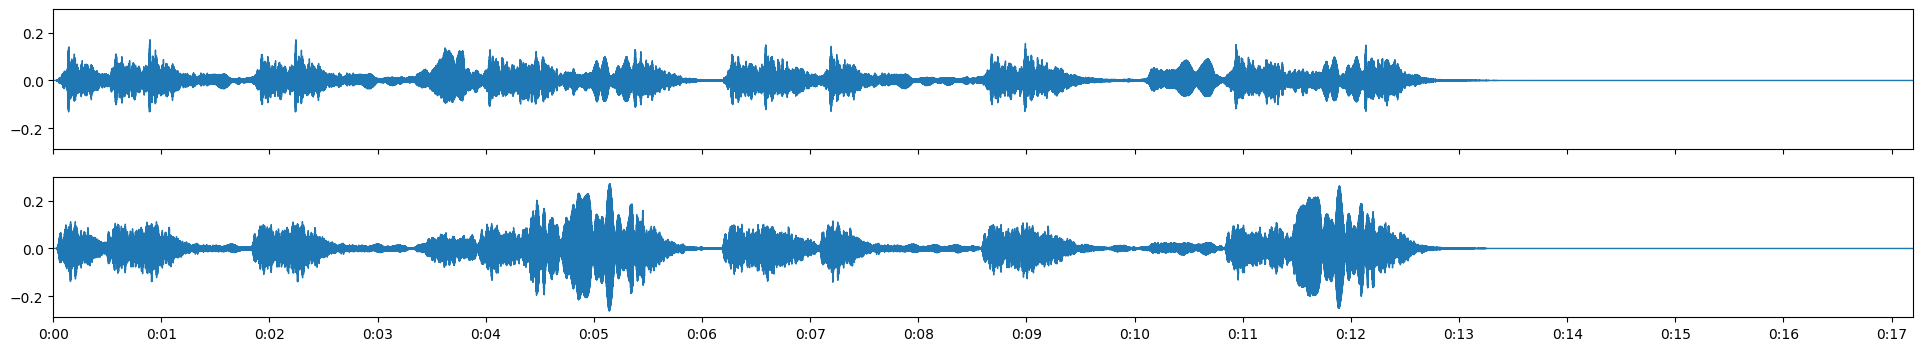

In [28]:
with render() as s:
    ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.01, 0.2))
    s.sched('post', dur=ch2.durSecs() + 4, priority=2, iroomsize=0.4, ihfdamp=0.9, igain=1.5)
s
    